# Géométrie et espaces de formes - TP 1


## 1. Noyaux reproduisants et interpolation


### Noyaux reproduisants

Soit $H$ un espace de Hilbert de fonctions $f:{\mathbb R}^d\rightarrow{\mathbb R}$. $H$ est un espace à noyau reproduisant s'il existe une fonction
$K_H:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ telle que $\forall x\in{\mathbb R}^d, K_H(\cdot,x)\in H$, et 

$$ \forall f\in H,\quad\forall x\in{\mathbb R}^d,\quad f(x)=\langle{K_H(\cdot,x)},f\rangle_H.$$

$K_H$ est alors défini de façon unique et est appelé noyau reproduisant de $H$. On peut remarquer que l'on a la propriété suivante (propriété reproduisante) :

$$\forall x,y\in{\mathbb R}^d,\quad \langle K_H(\cdot,x),K_H(\cdot,y)\rangle_H=K_H(x,y).$$

Inversement, il est possible, à partir d'une fonction $K:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ de type positif, de construire l'unique espace de Hilbert $H$ de fonctions tel que $K_H=K$.

### Un premier exemple : espace de Sobolev $H^1({\mathbb R})$

L'espace de Sobolev $H^1({\mathbb R})$ est l'espace des fonctions de $L^2({\mathbb R})$ dont la dérivée au sens faible appartient aussi à $L^2({\mathbb R})$. En fait tout élément de $H^1({\mathbb R})$ admet un représentant continu et on peut aussi définir $H^1({\mathbb R})$
de façon classique comme l'espace des fonctions $f:{\mathbb R}\rightarrow{\mathbb R}$ continues, de carré intégrable, dérivables presque partout et telles que $\int_x^yf'(t)dt=f(y)-f(x)$ pour tous réels $x,y$. Sur cet espace on définit habituellement le produit scalaire
$$\langle f,g\rangle_{H^1} = \int_{\mathbb R} f(t)g(t)+f'(t)g'(t)\;dt,$$
mais on peut aussi définir plus généralement pour une échelle $\sigma>0$ fixée,
$$\langle f, g\rangle_{H^1_\sigma} = \int_{\mathbb R} f(t)g(t)+\sigma^2f'(t)g'(t)\;dt.$$
On note $H^1_\sigma$ l'espace $H^1({\mathbb R})$ muni de ce produit scalaire. C'est un espace de Hilbert.

__Question 1__ : Montrer que $H^1_\sigma$ est un espace à noyau reproduisant dont le noyau est la fonction $K_\sigma:{\mathbb R}^2\rightarrow{\mathbb R}$ définie par

$$\forall x,y\in{\mathbb R},\quad K_\sigma(x,y)=\frac1{2\sigma}e^{-\frac{|x-y|}\sigma}.$$

Tout d'abord $t \mapsto K_{\sigma}(x,t) \in H^1_{\sigma}$ car c'est une fonction $C^{\infty}$ (sauf en $t=x$) donc continue, de carré intégrable et dérivable presque partout dont la derivée est elle aussi dans $L^2(\mathbb{R})$.

$\forall f \in H^1_{\sigma}$, $$\langle f, K_{\sigma}(x,\cdot) \rangle_{H^1_{\sigma}}$$ $$= \int_{\mathbb R} f(t) K_{\sigma}(x,t)+\sigma^2f'(t)K'_{\sigma}(x,t)\;dt$$ $$= \int_{- \infty}^x f(t) \frac1{2\sigma}e^{-\frac{x-t}\sigma} + f'(t)\frac{1}{2}e^{-\frac{x-t}\sigma}\;dt$$ $$+ \int_{x}^\infty f(t) \frac1{2\sigma}e^{-\frac{t-x}\sigma} - f'(t)\frac{1}{2}e^{-\frac{t-x}\sigma}\;dt$$ On reconnait la derivée d'un produit ce qui nous donne $$= \frac{1}{2}e^{-\frac{x-t}\sigma} f(t) \Bigg\vert_{- \infty}^{x} + \:\: -\frac{1}{2}e^{-\frac{t-x}\sigma} f(t) \Bigg\vert_{- \infty}^{x}$$ $$= \frac{1}{2} f(t) + \frac{1}{2} f(t)$$ $$= f(t)$$ Ce qui prouve que la propriété du noyau est verifiée.

__Question 2__ : Vérifier numériquement la propriété du noyau : choisir par exemple $\sigma=2$, une fonction $f\in H^1_\sigma$ quelconque (par exemple $f(x)=e^{-x^2}$), un réel $x\in{\mathbb R}$ quelconque, puis calculer une valeur approchée de $\langle f, {K_\sigma(\cdot,x)}\rangle_{H^1_\sigma}$ par sommes et différences finies et comparer avec $f(x)$. Vérifier également numériquement la propriété reproduisante.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
from mpl_toolkits.mplot3d import Axes3D

# fonction pour définir le noyau 
def KH1(x, y, sigma):
    return 1./(2*sigma) * np.exp(- np.abs(x-y)/sigma )

# fonction pour définir le produit scalaire
def H1ScalProd(f, g, sigma):
    I = np.linspace(-10*sigma, 10*sigma, 10000)
    f_i = f(I)
    g_i = g(I)
    delta = I[1] - I[0]
    diff_f = f_i[1:] - f_i[:-1]
    diff_g = g_i[1:] - g_i[:-1]
    return delta * ( (f_i*g_i).sum() + sigma**2 * ((diff_f/delta) * (diff_g/delta)).sum() )

# définition des paramètres et fonctions à tester  
sigma = 2
f = lambda x: np.exp(-x**2)
Kx = lambda t: KH1(t, 1, sigma)
Ky = lambda t: KH1(t, 2, sigma)

In [2]:
# test : valeur du produit scalaire <f,KH1(.,x)>_H1 et comparaison avec f(x)
print(H1ScalProd(f,Kx,sigma))
print(f(1))

0.36788087970103095
0.36787944117144233


In [3]:
# vérification de la propriété reproduisante : calcul de <KH1(.,y),KH1(.,x)>_H1 et comparaison avec KH1(x,y)
print(H1ScalProd(Kx,Ky,sigma))
print(KH1(1, 2, sigma))

0.15163272691011825
0.15163266492815836


### Problème d'interpolation scalaire

Le noyau $K_H$ permet de résoudre le problème d'interpolation suivant: 

$$\left\{\begin{array}{l}
\text{Minimiser }\left\|f\right\|_H\text{ pour }f\in H, 
\\ \text{sous les contraintes }f(y_i)=c_i,\quad 1\leq i\leq n
\end{array}\right.
$$

où $y_i\in{\mathbb R}^d, c_i\in$ sont fixés. La solution de ce problème est donnée par
$$f^*(x)=\sum_{j=1}^nK_H(x,y_j)a_j,$$
où les $a_j\in{\mathbb R}$ sont solutions du système linéaire

$$\forall i,\quad 1\leq i\leq n,\quad\sum_{j=1}^nK_H(y_i,y_j)a_j=c_i.$$

Ces équations peuvent s'écrire sous forme condensée: notons ${\bf y}=(y_1,\ldots,y_n)\in{\mathbb R}^{dn}, \boldsymbol{a}=(a_1,\ldots,a_n)\in{\mathbb R}^{n}, {\bf c}=(c_1,\ldots,c_n)\in{\mathbb R}^{n}$, et $K_H({\bf y},{\bf y})\in\mathcal{M}_{n}({\mathbb R})$ la matrice des $K_H(y_i,y_j)$ pour $1\leq i,j\leq n$. Le système linéaire à résoudre s'écrit alors

$$K_H({\bf y},{\bf y}){\bf a}={\bf c}.$$

De même, l'évaluation de la solution $f^*$ en des points $x_i\in{\mathbb R}^d, 1\leq i\leq p$ s'écrit 

$${\bf f}^*({\bf x})=K_H({\bf x},{\bf y}){\bf a},$$

où ${\bf x}=(x_1,\ldots,x_p)\in{\mathbb R}^{dp}$, ${\bf f}^*({\bf x})=(f^*(x_1),\ldots,f^*(x_p))$, et $K_H({\bf x},{\bf y})\in\mathcal{M}_{p,n}({\mathbb R})$ est la matrice des $K_H(x_i,y_j)$ pour $1\leq i\leq p$, $1\leq j\leq n$.\\

<br>
<br>

__Question 3__ : Ecrire une fonction
`KernelMatrix(x,y,h)` qui construit
la matrice $K_H({\bf x},{\bf y})$ pour des points ${\bf x}\in{\mathbb R}^{pd}$, ${\bf y}\in{\mathbb R}^{nd}$ quelconques (supposés entrés sous forme de tableaux $p\times d$ et $n\times d$), et un noyau de la forme $K_H(x,y)=h\left(\|x-y\|\right)$, où $h$ est une fonction scalaire. 

In [4]:
def KernelMatrix(x,y,h):
    # calcul de tous les xi - yj : tensors (p, n, d)
    diff = x[:,None,:] - y[None,:,:]
    # calcul de la norme des xi - yj
    norm = np.linalg.norm(diff, axis = 2)
    return h(norm)   

<br>
Voici un exemple de son utilisation :

In [5]:
import numpy as np
x = np.random.rand(10,2)        # 10 points tirés aléatoirement dans [0,1]^2
y = np.random.rand(15,2)        # 15 points tirés aléatoirement dans [0,1]^2
sigma = 1.5                     # échelle du noyau
def gauss(sigma):
    def f(u):
        return np.exp(-u**2/sigma**2)
    return f

<br>
<br>

__Question 4__ : Ecrire une fonction
`Interp(x,y,c,h)`
qui résout le problème d'interpolation $f(y_i)=c_i$, $1\leq i\leq n$ et renvoie l'évaluation de la solution aux points $x_i$, $1\leq i\leq p$`

In [6]:
def Interp(x,y,c,h):
    K = KernelMatrix(y,y,h)
    a = np.linalg.solve(K, c)
    f = KernelMatrix(x,y,h) @ a
    return f

<br>
<br>

__Question 5__ : Tester la fonction `Interp` tout d'abord avec $d=1$: 

In [7]:
np.random.seed(24)

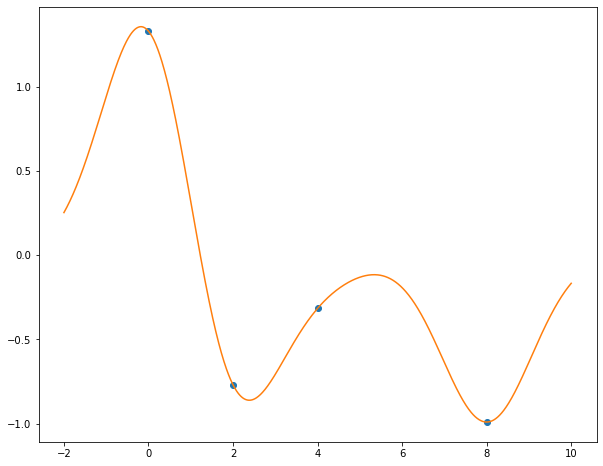

In [8]:
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation
fx = Interp(x,y,c,gauss(sigma))         # calcul de l'interpolation

plt.plot(y,c,'o')                       # affichage
plt.plot(x,fx);

<br>
<br>

Tester ensuite le même problème en changeant l'échelle du noyau : on prendra ainsi $h(u)=e^{-u^2/\sigma^2}$ pour $\sigma\in\{0.2,2,4,10\}$. Afficher sur le même graphique les différentes solutions. Tester également l'interpolation avec des noyaux de Cauchy : $h(u)=\frac1{1+u^2/\sigma^2}$.

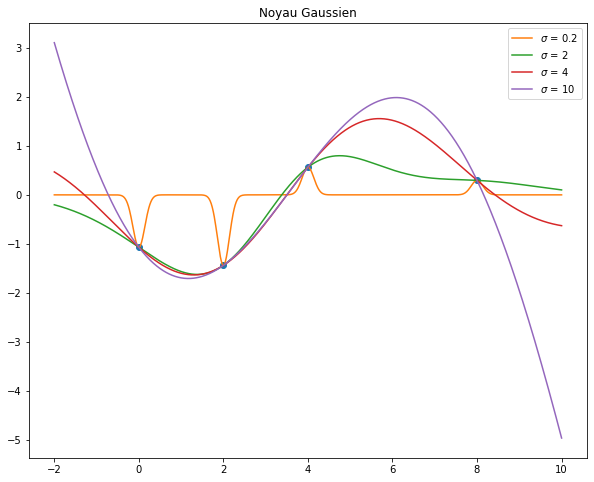

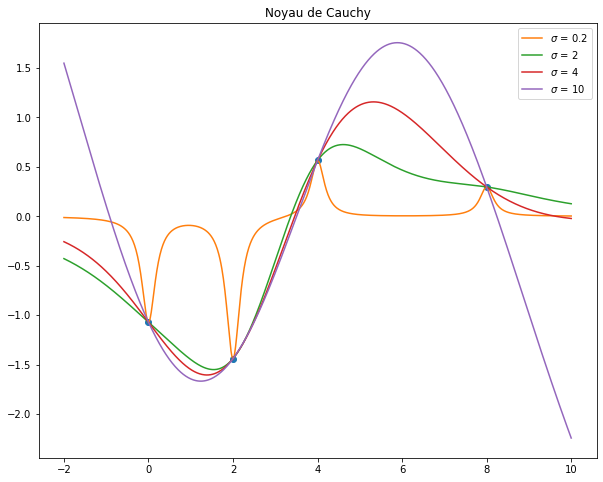

In [9]:
sigma = [0.2, 2, 4, 10]
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation

plt.plot(y,c,'o')                       # affichage
plt.title("Noyau Gaussien")
for s in sigma:
    fx = Interp(x,y,c,gauss(s))         # calcul de l'interpolation
    plt.plot(x,fx,label = f"$\sigma$ = {s}");
    plt.legend()
plt.show()
    
def cauchy(sigma):
    def f(u):
        return 1./(1 + u**2/sigma**2)
    return f

plt.plot(y,c,'o')                       # affichage
plt.title("Noyau de Cauchy")
for s in sigma:
    fx = Interp(x,y,c,cauchy(s))        # calcul de l'interpolation
    plt.plot(x,fx,label = f"$\sigma$ = {s}");
    plt.legend()
plt.show()

<br>
<br>

__Question 6__ : Effectuer l'interpolation avec un noyau $K_\sigma$ de la première partie, et vérifier numériquement 
que la norme dans $H^1_\sigma$ de la solution est toujours inférieure à la norme d'autres fonctions de $H^1_\sigma$ passant par les points (par exemple les solutions du problème d'interpolation avec d'autres noyaux).

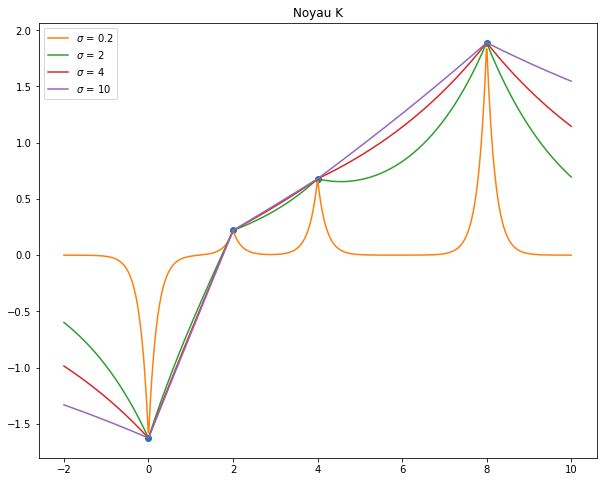

In [10]:
def K(sigma):
    def f(u):
        return 1./(2*sigma) * np.exp(- np.abs(u)/sigma )
    return f

sigma = [0.2, 2, 4, 10]
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation

plt.plot(y,c,'o')                       # affichage
plt.title("Noyau K")
for s in sigma:
    fx = Interp(x,y,c,K(s))             # calcul de l'interpolation
    plt.plot(x,fx,label = f"$\sigma$ = {s}");
    plt.legend()
plt.show()

In [12]:
no_error = True

sigma = [0.2, 2, 4, 10]
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement

for s in sigma:
    for i in range(1000):

        # Noyau Gaussien
        fx = lambda x: Interp(x[:,None],y,c,gauss(s)) 
        norm_gaussian_kernel = np.sqrt(H1ScalProd(fx, fx, s))
        
        # Noyau de Cauchy
        fx = lambda x: Interp(x[:,None],y,c,cauchy(s)) 
        norm_cauchy_kernel = np.sqrt(H1ScalProd(fx, fx, s))
        
        # noyau K
        fx = lambda x: Interp(x[:,None],y,c,K(s))
        norm_k_kernel = np.sqrt(H1ScalProd(fx, fx, s))
        
        if not (norm_k_kernel < norm_gaussian_kernel) | (norm_k_kernel < norm_cauchy_kernel):
            print("problem")
            no_error = False

print(f"La norme de la solution avec le noyau K est inferieure aux autres normes : {no_error}")

La norme de la solution avec le noyau K est inferieure aux autres normes : True


<br>
<br>

__Question 7__ : Tester à présent l'interpolation dans le cas $d=2$: choisir par exemple $10$ points $y_i$ dans $[0,1]^2$ et des réels $c_i$ tirés aléatoirement, puis évaluer sur une grille uniforme de $100*100$ points que l'on construira avec la commande suivante : `X1, X2 = np.meshgrid(t,t)`

In [13]:
def InterpGrid(X1,X2,y,c,h) :
    K = KernelMatrix(y,y,h)
    a = np.linalg.solve(K, c)
    x = np.stack((X1, X2), axis=-1).reshape((-1,2))
    f = KernelMatrix(x,y,h) @ a  
    return f.reshape(X1.shape)
    
n = 10
d = 2
sigma = .25
y = np.random.rand(n,d)    # 10 points tirés aléatoirement dans [0,1]^2
c = np.random.randn(n,1)   # 10 valeurs aléatoires
t = np.linspace(0,1,50)
X1, X2 = np.meshgrid(t,t)  # grille uniforme de 50*50 points
Z = InterpGrid(X1,X2,y,c,gauss(sigma))

<br>

Si les valeurs interpolées sont dans le tableau `fX` de taille $100*100$, on affichera ensuite la solution avec

<ipython-input-14-c8f9e1cb58dd>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection='3d')


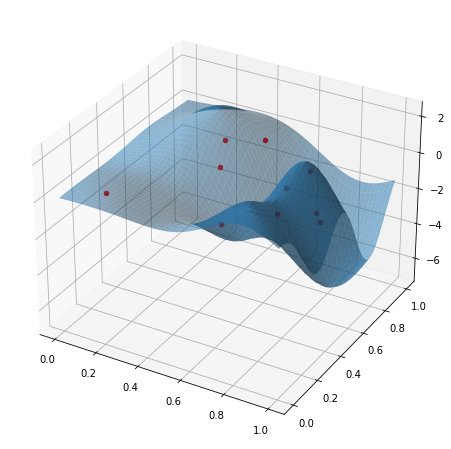

In [14]:
fig = plt.figure()
plt.title("interpolation de fonction 2D")
ax = plt.axes(projection='3d')
ax.plot_surface(X1,X2,Z,alpha=0.5)
ax.scatter3D(y[:,0],y[:,1],c,c='r',depthshade=False)

<br>
<br>

### Interpolation relaxée

Dans certains cas, les contraintes d'interpolation peuvent s'avérer trop fortes pour la norme de Hilbert utilisée (typiquement lorsque le paramètre d'échelle $\sigma$ est grand par rapport aux positions des points d'interpolation). Numériquement ceci se traduit par une matrice d'interpolation très mal conditionnée. D'autre part les données d'observation peuvent être bruitées, auquel cas une fonction passant exactement par les contraintes n'est plus désirable. Une solution consiste alors à écrire un problème d'interpolation relaxé ($\textit{smoothing spline interpolation}$) : 

$$\text{Minimiser }\quad\lambda\left\|f\right\|_H^2+\sum_{i=1}^n(f(y_i)-c_i)^2,$$
où $\lambda>0$ est un paramètre à fixer. 

<br>

__Question 8__ : Montrer que la solution de l'interpolation inexacte s'obtient en rajoutant $\lambda$ aux coefficients diagonaux de la matrice du système linéaire.

La fonction de $f$ à minimiser ci dessus est convexe et differentiable. On cherche donc $f^{\star}$ en égalisant le gradient à 0.
\begin{align*}
\nabla_f & \left( \lambda ||f||_H^2 + \sum_{i=1}^n \left( \langle f, K_H(\cdot, y_i) \rangle_H - c_i \right)^2 \right) = 0\\
\iff & 2 \lambda f + 2 \sum_{i=1}^n K_H(\cdot, y_i) \left[ \langle f, K_H(\cdot, y_i) \rangle_H - c_i \right] = 0\\
\iff & \lambda f + \sum_{i=1}^n K_H(\cdot, y_i) [f(y_i) - c_i] = 0\\
\iff & f^{\star} = \frac{1}{\lambda} \sum_{i=1}^n K_H(\cdot, y_i) [c_i - f^{\star}(y_i)]\\
\end{align*}

Nous savons de plus que la solution $f^{\star}$ est telle que
$$f^{\star}(y_j)=\sum_{i=1}^n K_H(y_j,y_i) \: a_i$$
Par identification on a ainsi : $$\forall i,\quad 1\leq i\leq n,\quad a_i = \frac{1}{\lambda} \left( c_i - f^{\star}(y_i) \right) = \frac{1}{\lambda} \left( c_i - \sum_{j=1}^n K_H(y_i,y_j) \: a_j \right)$$

<br>

Modifier les fonctions précédentes pour prendre en compte ce nouveau modèle, et le tester sur les exemples précédents et sur l'exemple suivant :
```
y = np.linspace(0,1,30)[:,None]
c = np.cos(6*y) + .05*np.random.randn(30,1)
```
avec $h(u)=e^{-u^2/\sigma^2}$ et les jeux de paramètres suivants : $\sigma\in\{0.1,0.25\}, \lambda\in\{0,0.1\}$.

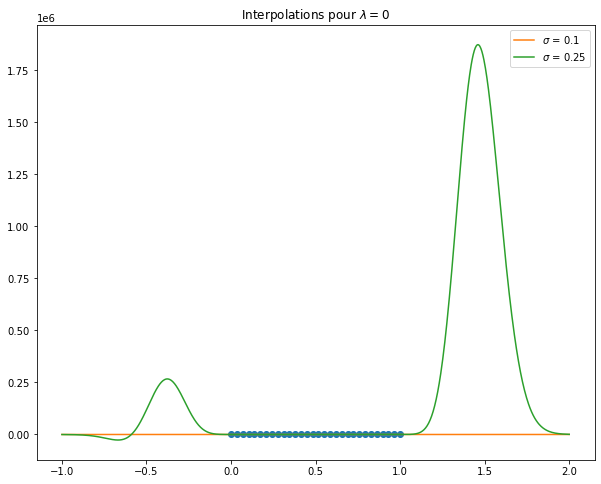

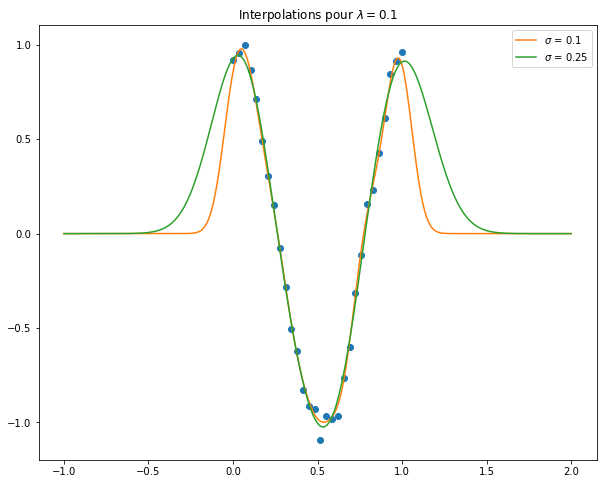

In [15]:
# redéfinition de Interp pour inclure le paramètre lambda
def Interp(x,y,c,h,l):
    K = KernelMatrix(y,y,h)
    a = np.linalg.solve(K + l * np.eye(K.shape[0]), c)
    f = KernelMatrix(x,y,h) @ a
    return f

# tests pour différentes valeurs de sigma et de lambda
n = 30
y = np.linspace(0,1,n)[:,None]
c = np.cos(6*y) + .05*np.random.randn(n,1)

sigma = [0.1, 0.25]
lambdaa = [0, 0.1]
x = np.linspace(-1,2,1000)[:,None]       # points xj où évaluer l'interpolation

for l in lambdaa:
    plt.plot(y,c,'o')                    # affichage
    plt.title(f"Interpolations pour $\lambda = {l}$")
    for s in sigma:
        fx = Interp(x,y,c,gauss(s),l)    # calcul de l'interpolation
        plt.plot(x,fx,label = f"$\sigma$ = {s}");
        plt.legend()
    plt.show()

<br>
<br>

### Problème d'interpolation vectorielle

On suppose à présent que $V$ est un espace de Hilbert de fonctions à valeurs vectorielles $v:{\mathbb R}^d\rightarrow{\mathbb R}^m$. 
S'il existe, le noyau reproduisant $K_V$ de l'espace $V$ est alors une application ${\mathbb R}^d\times{\mathbb R}^d\rightarrow\mathcal{M}_m({\mathbb R})$, définie par la relation: 

$$ \forall v\in V,\forall x\in{\mathbb R}^d,\forall \alpha\in{\mathbb R}^m,\quad\langle{v(x)},{\alpha}\rangle=\langle{K_V(\cdot,x)\alpha},v\rangle_V.$$

La propriété reproduisante s'écrit alors

$$ \forall x,y\in{\mathbb R}^d,\forall \alpha,\beta\in{\mathbb R}^m,\quad\left\langle {K_V(\cdot,x)\alpha},{K_V(\cdot,y)\beta}\right\rangle_V=\langle{K_V(x,y)\beta},{\alpha}\rangle.$$

On considère le problème exact d'interpolation vectorielle suivant: 

$$\text{Minimiser }\left\| v\right\|_V\text{ pour $v\in V$, sous les contraintes }v(y_i)=\gamma_i,$$

où $y_i\in{\mathbb R}^d, \gamma_i\in{\mathbb R}^m$ sont fixés, $1\leq i\leq n$. On considère aussi le problème inexact associé :

$$\text{Minimiser }\gamma\|v\|_V^2+\sum_{i=1}^n\|v(y_i)-\gamma_i\|^2,$$

__Question 9__ : Montrer que pour un noyau de la forme $K_V(x,y)=h(\|x-y\|)I_m$, les problèmes d'interpolation vectoriels exacts et inexacts sont équivalents à $m$ problèmes d'interpolation scalaires
avec le noyau scalaire $K_H(x,y)=h(\|x-y\|)$ (on supposera que ce noyau $K_H$ est bien le noyau reproduisant d'un espace de Hilbert $H$ de fonctions scalaires).

_Problème d'interpolation exact :_

$$
\left(E\right) \left\{
    \begin{array}{ll}
    \mbox{Minimiser} & ||v||_V \\
    \mbox{sous contraintes} & v(y_i) = \gamma_i \forall i, \: 1 \leq i \leq n
    \end{array}
\right.
$$

$$
\left(E\right) \iff \left\{
    \begin{array}{ll}
    \mbox{Minimiser} & ||v||^2_V \\
    \mbox{sous contraintes} & v(y_i) = \gamma_i \forall i, \: 1 \leq i \leq n
    \end{array}
\right.
$$

On introduit le Lagrangien, où $\mu$ est le multiplicateur de Lagrange :

\begin{align*}
\mathcal{L}(v, \mu) & = ||v||^2_V + \sum_{i=1}^n \mu_i (v(y_i) - \gamma_i)\\
& = ||v||^2_V + \langle v(y), \mu \rangle - \sum_{i=1}^n \mu_i \gamma_i\\
& = ||v||^2_V + \langle K_V(\cdot,y) \mu, v \rangle_V - \sum_{i=1}^n \mu_i \gamma_i\\
& \\
\nabla_v \mathcal{L}(v, \mu) & = 0\\
2 v + \sum_{i=1}^n K_V(\cdot,y_i) \mu_i & = 0\\
\iff v & = - \frac{1}{2} \sum_{i=1}^n K_V(\cdot,y_i) \: \mu_i \\
\end{align*}

En notant que la solution $v^{\star}$ est telle que $\forall j, \: 1 \leq j \leq n$
$$v^{\star}(y_j) = \sum_{i=1}^n K_V(y_j,y_i) \: a_i = \gamma_j$$ on identifie $a_i = - \frac{\mu_i}{2}$. 

De plus, puisque $K_V(x,y) = h(||x-y||)I_m$ $$\sum_{i=1}^n K_V(y_j,y_i) \: a_i = \gamma_j$$ 

$$\iff \sum_{i=1}^n \underbrace{h(||y_i-y_j||)I_m \: a_i}_{m \times 1} = \underbrace{\gamma_j}_{m \times 1}$$

$$\iff \sum_{i=1}^n \begin{bmatrix} h(||y_i-y_j||) \times a_{i,1}\\ \vdots \\ h(||y_i-y_j||) \times a_{i,m} \end{bmatrix} = \begin{bmatrix} \gamma_{j,1} \\ \vdots \\ \gamma_{j,m} \end{bmatrix}$$

Ce qui correspond bien à $m$ problèmes d'interpolation avec le noyau $h{||x-y||}$.

_Problème d'interpolation inexact :_

$$
\left(I\right) \left\{
    \begin{array}{ll}
    \mbox{Minimiser} & \gamma ||v||^2_V + \sum_{i=1}^n ||v(y_i) - \gamma_i||^2
    \end{array}
\right.
$$

La fonction de $v$ à minimiser ci dessus est convexe et differentiable. 
\begin{align*}
\nabla_v & \left( \lambda ||v||_V^2 + \sum_{i=1}^n \left( \langle v, K_V(\cdot, y_i) \rangle_H - \gamma_i \right)^2 \right) = 0\\
\iff & \gamma v + \sum_{i=1}^n K_V(\cdot, y_i) \left[ \langle v, K_V(\cdot, y_i) \rangle_V - \gamma_i \right] = 0\\
\iff & \gamma v + \sum_{i=1}^n K_V(\cdot, y_i) \left[ v(y_i) - \gamma_i \right] = 0\\
\iff & v^{\star} = \frac{1}{\gamma} \sum_{i=1}^n K_V(\cdot, y_i) [\gamma_i - v^{\star}(y_i)]\\
\end{align*}

Comme a la **question 8** nous avons donc 

\begin{align*}
    \forall i,\quad 1\leq i\leq n,\quad a_i & = \frac{1}{\gamma} \left( \gamma_i - v^{\star}(y_i) \right)\\
    & = \frac{1}{\gamma} \left( \gamma_i - \sum_{j=1}^n K_V(y_i,y_j) \: a_j \right)\\
    & = \frac{1}{\gamma} \left( \gamma_i - \sum_{j=1}^n h(||y_j-y_i||)I_m \: a_j \right)\\
    & \iff \underbrace{\gamma_i}_{m \times 1} = \underbrace{a_i \gamma}_{m \times 1} + \sum_{j=1}^n \underbrace{h(||y_j-y_i||) I_m \: a_j}_{m \times 1} \\
\end{align*}


<br>

Si besoin, modifier la fonction `Interp` pour qu'elle puisse aussi résoudre les problèmes d'interpolation vectorielle.

<br>

__Question 10__ : Tester la fonction `Interp` avec $d=m=2$: générer des points $y_i$ dans $[0,1]^2$ (commencer avec $n=3$), des vecteurs $\gamma_i$ avec la commande `gamma = 0.05*np.random.randn(n,d)` puis évaluer sur une grille uniforme de taille 20*20. Afficher le champ de vecteurs obtenu avec la fonction `quiver` de Matplotlib.

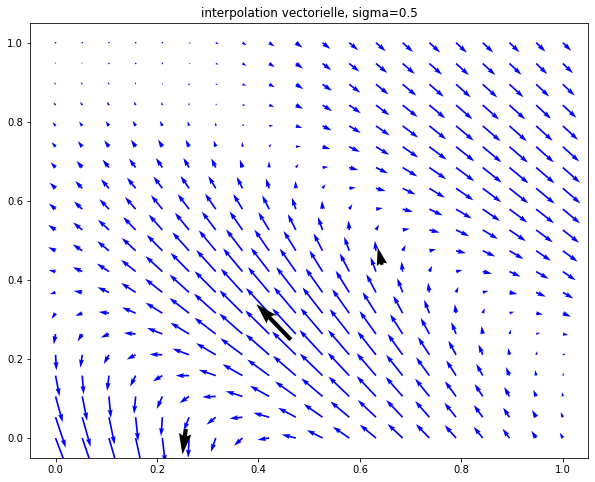

In [16]:
def InterpGrid2D(X1,X2,y,c,h,l) :
    K = KernelMatrix(y,y,h)
    a = np.linalg.solve(K, c)
    x = np.stack((X1, X2), axis=-1).reshape((-1,2))
    f = KernelMatrix(x,y,h) @ a  
    return f.reshape(X1.shape[0],X1.shape[1],-1).transpose(2, 0, 1)

n = 3
d = 2
m = 2
sigma = .5
y = np.random.rand(n,d)
gamma = 0.05*np.random.randn(n,m)
t = np.linspace(0,1,20)
X1, X2 = np.meshgrid(t,t)
V1, V2 = InterpGrid2D(X1,X2,y,gamma,gauss(sigma),0)
plt.title("interpolation vectorielle, sigma="+str(sigma))
plt.quiver(X1,X2,V1,V2,color='b')
plt.quiver(y[:,0],y[:,1],gamma[:,0],gamma[:,1]);


<br>
<br>

## Appariement de points labellisés

### Appariement linéaire

Le problème d'interpolation vectorielle précédent, pour $d=m$, peut être vu comme un problème d'appariement de points. Pour la version "exacte", ceci s'écrit :
$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

On se ramène simplement au problème précédent en posant $\gamma_i=z_i-y_i$.

<br>

__Question 11__ : On se place dans le plan ($d=m=2$). Reprendre l'exemple de la question précédente, en affichant cette fois dans un même graphique les points $y_i$ et $z_i$ et visualiser la solution $\phi$ en calculant et en affichant le déplacement d'une grille de points.

Pour le dessin du deplacement de la grille de point : _https://stackoverflow.com/questions/47295473/how-to-plot-using-matplotlib-python-colahs-deformed-grid/47295960#47295960_

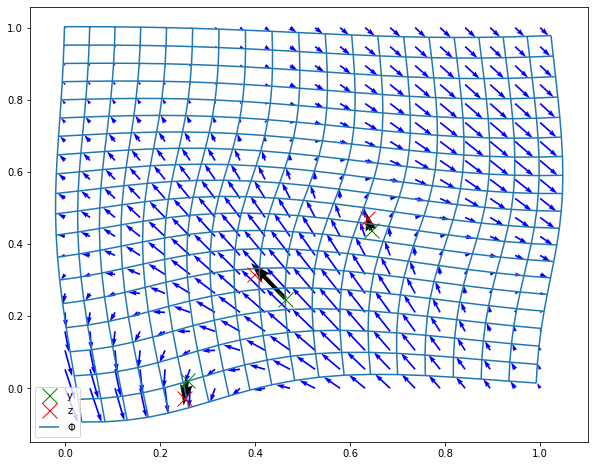

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def plot_grid(x,y, ax=None, **kwargs):
    ax = ax or plt.gca()
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2))
    ax.autoscale()

plt.quiver(X1,X2,V1,V2,color='b')
plt.quiver(y[:,0],y[:,1],gamma[:,0],gamma[:,1])

plot_grid(X1+V1, X2+V2, label="$\Phi$")                 # Phi

plt.plot(y[:,0],y[:,1],"gx", markersize=15, label="y")  # y

z = y + gamma
plt.plot(z[:,0],z[:,1],"rx", markersize=15, label="z")  # z

plt.legend();

<br>

__Question 12__ : Charger le fichiers `hand1.mat` et `hand2.mat` avec les commandes :

In [18]:
import scipy.io
C1 = scipy.io.loadmat('hand1.mat')['C1']
C2 = scipy.io.loadmat('hand2.mat')['C2']

Les tableaux `C1` et `C2` 
contiennent les coordonnées de deux contours de mains. Avec le code suivant, sélectionner des points de référence (extrémités des doigts, etc.) pour chacun :

In [19]:
coord1_min, coord2_min = C1.min(0)
coord1_max, coord2_max = C1.max(0)

In [20]:
%matplotlib tk
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
plt.plot(C1[:,0],C1[:,1])
y = np.array(plt.ginput(0))
plt.plot(y[:,0],y[:,1],'o')
plt.show()
plt.figure()
plt.plot(C2[:,0],C2[:,1])
z = np.array(plt.ginput(0))
plt.plot(z[:,0],z[:,1],'o')
plt.show()

In [22]:
y

array([[0.37622012, 0.81027298],
       [0.60857585, 0.82739223],
       [0.73592467, 0.74750237],
       [0.7068802 , 0.64193363],
       [0.63203485, 0.46360805],
       [0.53819888, 0.42508972],
       [0.42760649, 0.42223651],
       [0.33600471, 0.46788786],
       [0.27009611, 0.53351168],
       [0.14833277, 0.326654  ],
       [0.29243801, 0.14690182],
       [0.46670481, 0.081278  ],
       [0.6856554 , 0.15831465],
       [0.93141627, 0.633374  ]])

In [21]:
z

array([[0.23503826, 0.76323661],
       [0.43166069, 0.69125   ],
       [0.55432423, 0.5746317 ],
       [0.51734478, 0.48392857],
       [0.43887619, 0.38026786],
       [0.35950567, 0.33851563],
       [0.2765274 , 0.34715402],
       [0.19445106, 0.39610491],
       [0.13041348, 0.44217634],
       [0.07539527, 0.2118192 ],
       [0.23143051, 0.08944196],
       [0.32613397, 0.04912946],
       [0.45420914, 0.08368304],
       [0.69953621, 0.43641741]])

<br>

Réaliser l'appariement des deux ensembles de points puis afficher sur un même graphique la courbe $C_2$ et ses points de référence, la courbe transformée $\phi(C_1)$ et le déplacement d'une grille de points.`

In [23]:
n = len(z)
d = 2
m = 2
sigma = .5

gamma = z - y
t1 = np.linspace(coord1_min, coord1_max,n)
t2 = np.linspace(coord2_min, coord2_max,n)

X1, X2 = np.meshgrid(t1,t2)
V1, V2 = InterpGrid2D(X1,X2,y,gamma,gauss(sigma),0)

plt.quiver(X1,X2,V1,V2,color='b')

Phi_C1 = C1 + Interp(C1,y,gamma,gauss(sigma),0)

plot_grid(X1+V1, X2+V2) 
plt.plot(C2[:,0],C2[:,1],label="$C_2$")
plt.plot(Phi_C1[:,0],Phi_C1[:,1],label="$\Phi(C_1)$")
plt.plot(z[:,0],z[:,1],"o", markersize=15)
plt.show()

plt.legend();

<br>
<br>

## Ajout des déplacements affines et modèle Thin Plate Splines

Il est possible d'ajouter au modèle les déplacements affines. Le problème d'appariement exact devient alors:

$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)+Bx+c
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

où $B$ est une matrice carrée de taille $d$ et $c$ un vecteur. On peut montrer que le champ de vecteur optimal s'écrit toujours comme une combinaison linéaire des noyaux $K_V(\cdot,y_i)$. 

Je ne sais pas comment faire la fin du TP... Je prefere vous rendre ca maintenant plutot qu'un travail trop en retard.

<br>

__Question 13__ : Trouver le système linéaire à résoudre pour obtenir les coefficients des vecteurs $\alpha_i$, $c$, et de la matrice $B$, puis implémenter cet appariement. Reprendre l'exemple des contours de mains avec ce nouveau modèle.

<br>

__Question 14__ : Tester à présent ce nouveau modèle avec le noyau $h(r)=r^2\log(r)$. Ce noyau n'est pas de type positif mais semi-positif, et n'est utilisable qu'en incluant les transformations affines. C'est le modèle de spline "plaque mince" (TPS: Thin Plate Splines).